# UOT32 - Underwater Benchmark Dataset

## Import Data

In [1]:
import numpy as np

In [2]:
import os
import cv2

def load_dataset(dataset_dir):
    dataset = []
    
    # Iterate through each class folder
    for class_folder in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_folder)
        
        # Check if it's a directory
        if os.path.isdir(class_path):
            images = []
            annotations = []
            
            # Read images and ground truth from the class folder
            img_folder = os.path.join(class_path, 'img')
            gt_file = os.path.join(class_path, 'groundtruth_rect.txt')
            
            # Read ground truth file
            line_count = 0
            with open(gt_file, 'r') as file:
                for line in file:
                    # Parse bounding box coordinates
                    # Format: x_min, y_min, width, height
                    bbox = [float(coord) for coord in line.strip().split()]
                    annotations.append(bbox)
                    
                    line_count += 1
                    if line_count >= 200:
                        break
            
            # Read and resize images
            for img_file in os.listdir(img_folder):
                if img_file.endswith('.jpg'):
                    img_path = os.path.join(img_folder, img_file)
                    image = cv2.imread(img_path)
                    # Resize image to 224x224
                    image.shape
                    image = cv2.resize(image, (224, 224))
                    images.append(image)
            
            dataset.append({'class': class_folder, 'images': images, 'annotations': annotations})
    
    return dataset


dataset_dir = 'archive (1)'
dataset = load_dataset(dataset_dir)

In [3]:
import numpy as np

# Initialize lists to store images and corresponding class labels
images_list = []
class_labels_list = []

# Iterate over the dataset
for item in dataset:
    # Extract class label
    class_label = item['class']
    
    # Extract images
    images = item['images']
    
    # Add class label to each image array and append to the images list
    for image in images:
        images_list.append(image)
        class_labels_list.append(class_label)

# Convert lists to numpy arrays for easier manipulation
images_array = np.array(images_list)
class_labels_array = np.array(class_labels_list)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Extract images and annotations from the dataset
images = []
annotations = []
labels = []
for item in dataset:
    images.extend(item['images'])
    annotations.extend(item['annotations'])

# Convert lists to NumPy arrays
images = np.array(images)
annotations = np.array(annotations)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming labels_train is an array of string labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_labels_array)

In [5]:
images.shape

(6400, 224, 224, 3)

In [17]:
encoded_labels.shape

(6400,)

In [18]:
annotations.shape

(6400, 4)

In [21]:
features_1 = np.load('mobile_features.npy')

In [19]:
features_2 = np.load('resnet_features.npy')

In [20]:
features_3 = np.load('inception_features.npy')

## Feature Extraction Using MobileNet

In [67]:
from keras.applications.mobilenet import MobileNet
model_mobile = MobileNet(weights='imagenet',include_top=False, pooling='avg')

In [68]:
mobile_features = model_mobile.predict(images)

200/200 [==============================] - 221s 1s/step


In [70]:
features_1 = mobile_features.reshape(mobile_features.shape[0], -1)

In [71]:
features_1.shape

(6400, 1024)

In [94]:
np.save('mobile_features.npy', features_1)

In [116]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features_1, encoded_labels, test_size=0.3, random_state=42)

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [118]:
# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.55208333333333


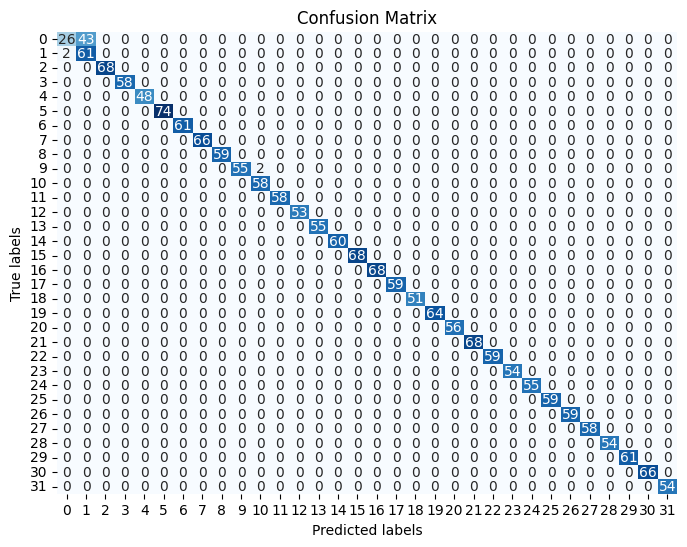

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [120]:
import joblib

# Saving the trained model
joblib.dump(svc, 'MobileNet.pkl')

['MobileNet.pkl']

## Feature Extraction Using ResNet

In [92]:
from keras.applications import ResNet50

model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [93]:
resnet_features = model_resnet.predict(images)

200/200 [==============================] - 1363s 7s/step


In [95]:
features_2 = resnet_features.reshape(resnet_features.shape[0], -1)

In [96]:
features_2.shape

(6400, 2048)

In [97]:
np.save('resnet_features.npy', features_2)

In [121]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features_2, encoded_labels, test_size=0.3, random_state=42)

In [122]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.29166666666667


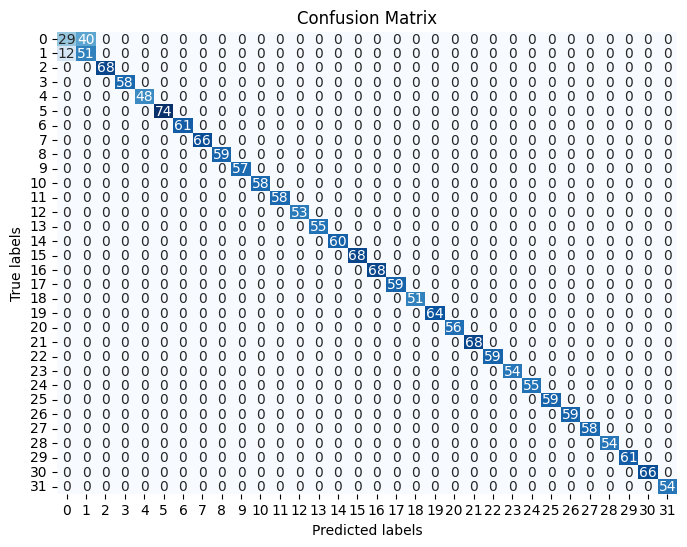

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [123]:
import joblib

# Saving the trained model
joblib.dump(svc, 'ResNet.pkl')

['ResNet.pkl']

## Feature Extraction Using Inception

In [108]:
from keras.applications import InceptionV3

model_inception = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

In [109]:
inception_features = model_inception.predict(images)

200/200 [==============================] - 699s 3s/step


In [110]:
features_3 = inception_features.reshape(inception_features.shape[0], -1)

In [111]:
features_3.shape

(6400, 2048)

In [112]:
np.save('inception_features.npy', features_3)

In [125]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features_3, encoded_labels, test_size=0.3, random_state=42)

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  96.40625


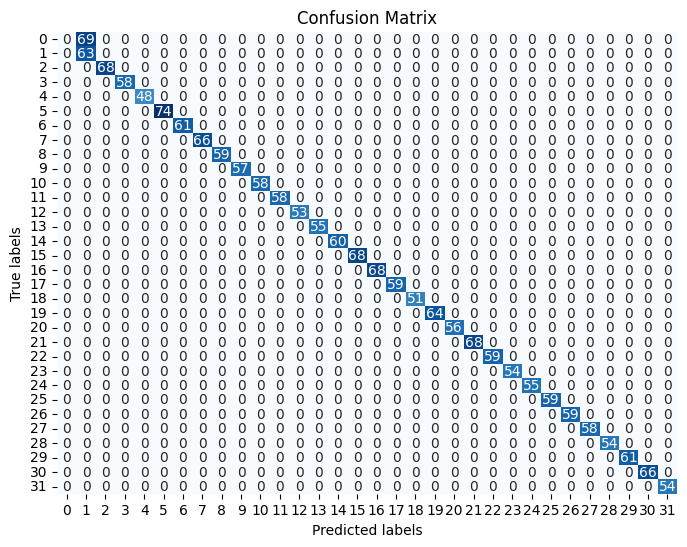

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [128]:
import joblib

# Saving the trained model
joblib.dump(svc, 'Inception.pkl')

['Inception.pkl']

## Feature Selection Using Genetic Algorithm

### On MobileNet Features

In [23]:
from genetic_selection import GeneticSelectionCV
from sklearn.svm import SVC

estimator = SVC()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=100,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(features_1, encoded_labels)

In [25]:
selected_features_indices = np.where(model.support_)[0]
print('Features:', selected_features_indices)

Features: [   7   14   41   43   47   55   65   67   71  105  107  128  135  148
  170  175  217  225  243  250  263  274  276  285  323  324  336  338
  352  385  388  395  401  406  416  429  432  460  461  474  491  492
  511  543  582  631  651  705  719  722  741  757  771  776  777  785
  788  793  806  816  818  819  837  841  845  865  884  893  895  903
  906  932  933  941  951  953  997 1005 1017]


In [26]:
selected_features = features_1[:, selected_features_indices]
print('Selected features:', selected_features)

Selected features: [[1.5536752  0.         0.12227294 ... 0.         0.25563753 0.        ]
 [1.6288143  0.         0.0684258  ... 0.         0.19625092 0.        ]
 [1.2698202  0.         0.11113729 ... 0.         0.07505216 0.        ]
 ...
 [1.3942277  0.0960387  1.3979005  ... 0.7952336  0.1136855  0.00964705]
 [1.3024468  0.11084649 1.89666    ... 1.0979385  0.06495536 0.04425906]
 [1.3274277  0.2634515  1.691565   ... 0.72965133 0.11764303 0.02815964]]


In [27]:
selected_features.shape

(6400, 79)

In [43]:
# File path to save the selected features
file_path = "selected_features_1.npy"

# Save the selected features to the file
np.save(file_path, selected_features)

print("Selected features saved to", file_path)

Selected features saved to selected_features_1.npy


In [28]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features, encoded_labels, test_size=0.3, random_state=42)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  99.11458333333333


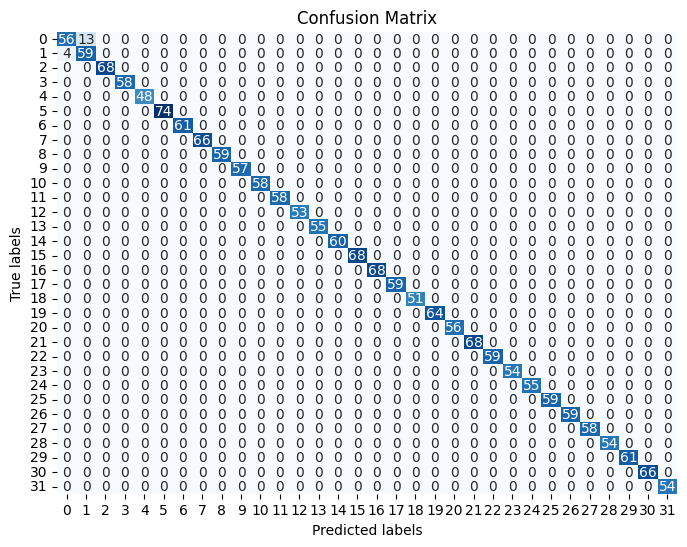

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import joblib

# Saving the trained model
joblib.dump(svc, 'GA_MobileNet.pkl')

['GA_MobileNet.pkl']

### On ResNet Features

In [11]:
from genetic_selection import GeneticSelectionCV
from sklearn.svm import SVC

estimator = SVC()
model = GeneticSelectionCV(
    estimator, verbose=0,
    scoring="accuracy", max_features=100,
    n_population=100, crossover_proba=0.3,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(features_2, encoded_labels)

In [12]:
selected_features_indices = np.where(model.support_)[0]
print('Features:', selected_features_indices)

Features: [  11   22   51   65   83  124  128  177  197  233  239  366  388  412
  426  428  502  518  521  545  589  615  674  720  736  769  836  984
 1019 1042 1058 1086 1171 1215 1247 1274 1347 1358 1359 1379 1396 1417
 1423 1432 1459 1536 1541 1570 1581 1600 1613 1663 1745 1750 1792 1833
 1853 1854 1955 2005 2006 2010]


In [13]:
selected_features_2 = features_2[:, selected_features_indices]
print('Selected features:', selected_features_2)

Selected features: [[0.6029009  0.17015426 0.13601391 ... 0.20821436 0.03392161 0.        ]
 [0.53610617 0.09671222 0.28786218 ... 0.17860879 0.06840473 0.        ]
 [1.2100219  0.         0.25599173 ... 0.09005296 0.23009858 0.        ]
 ...
 [3.0968883  2.058466   0.9919851  ... 0.10971229 0.21096215 0.0845182 ]
 [3.8338113  2.2615201  0.99026114 ... 0.06852887 0.28959835 0.04534787]
 [3.653967   2.7069588  0.95975155 ... 0.03780787 0.15549718 0.09865058]]


In [14]:
selected_features_2.shape

(6400, 62)

In [44]:
# File path to save the selected features
file_path = "selected_features_2.npy"

# Save the selected features to the file
np.save(file_path, selected_features_2)

print("Selected features saved to", file_path)

Selected features saved to selected_features_2.npy


In [15]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_2, encoded_labels, test_size=0.3, random_state=42)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.34375


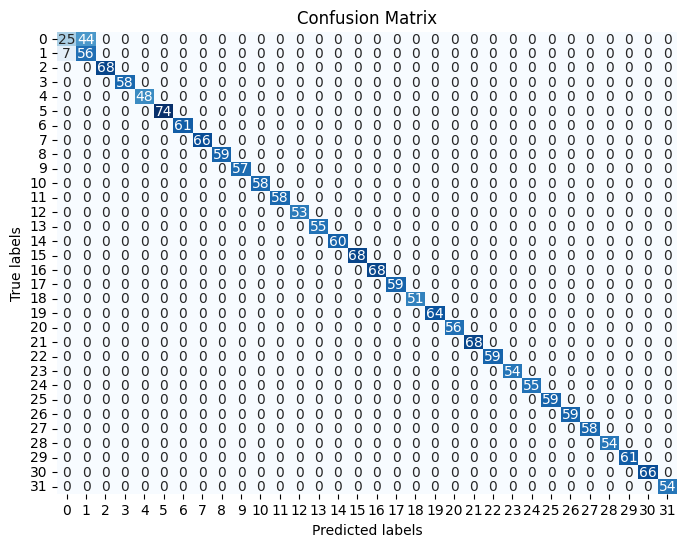

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
import joblib

# Saving the trained model
joblib.dump(svc, 'GA_ResNet.pkl')

['GA_ResNet.pkl']

### On Inception Features

In [32]:
from genetic_selection import GeneticSelectionCV
from sklearn.svm import SVC

estimator = SVC()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=100,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(features_3, encoded_labels)

In [33]:
selected_features_indices = np.where(model.support_)[0]
print('Features:', selected_features_indices)

Features: [  51   68  123  192  199  216  220  226  230  239  253  272  310  327
  415  450  476  479  482  487  491  506  524  554  557  564  579  610
  648  661  697  723  767  799  802  811  834  859  862  865  944  953
  977  991 1010 1063 1082 1090 1121 1127 1140 1169 1173 1183 1215 1221
 1236 1267 1294 1319 1346 1355 1380 1400 1430 1469 1474 1484 1489 1502
 1520 1521 1528 1533 1534 1535 1557 1604 1609 1629 1638 1649 1725 1746
 1750 1941 1957 1999 2015 2018 2020 2024]


In [34]:
selected_features_3 = features_3[:, selected_features_indices]
print('Selected features:', selected_features_3)

Selected features: [[26.545794    3.2539797   0.8827499  ...  0.         49.514214
   3.3850513 ]
 [26.906818    3.5239604   0.91140014 ...  0.         49.3945
   3.3271015 ]
 [31.515417    6.8587785   1.3081115  ...  0.         46.17466
   0.52191794]
 ...
 [15.503407   43.100365    5.0377254  ...  0.         49.44053
   0.        ]
 [17.26931    44.604237    5.479922   ...  0.         50.12111
   0.        ]
 [16.868443   46.420933    6.069838   ...  0.         50.350983
   0.        ]]


In [35]:
selected_features_3.shape

(6400, 92)

In [42]:
# File path to save the selected features
file_path = "selected_features_3.npy"

# Save the selected features to the file
np.save(file_path, selected_features_3)

print("Selected features saved to", file_path)

Selected features saved to selected_features_3.npy


In [38]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_3, encoded_labels, test_size=0.3, random_state=42)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  96.875


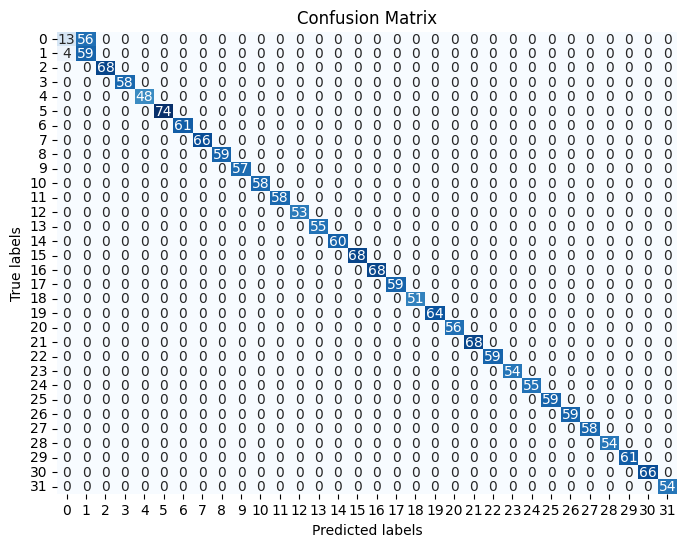

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
import joblib

# Saving the trained model
joblib.dump(svc, 'GA_Inception.pkl')

['GA_Inception.pkl']

## Feature Selection Using Ant Colony Optimization

### On MobileNet Features

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to perform Ant Colony Optimization for feature selection
def ant_colony_optimization(features, labels, num_selected_features, num_ants, iterations):
    num_features = features.shape[1]
    pheromone = np.ones(num_features)  # Initialize pheromone levels
    best_features = None
    best_accuracy = 0

    for _ in range(iterations):
        ant_paths = np.zeros((num_ants, num_selected_features), dtype=int)

        # Construct ant paths
        for ant in range(num_ants):
            probabilities = pheromone / np.sum(pheromone)
            selected_features = np.random.choice(num_features, num_selected_features, replace=False, p=probabilities)
            ant_paths[ant] = selected_features

        # Evaluate ant paths using SVM
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            X_train, X_test, y_train, y_test = train_test_split(features[:, selected_features], labels, test_size=0.3)
            clf = SVC()
            clf.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, clf.predict(X_test))

            # Update best features if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = selected_features

        # Update pheromone levels
        pheromone *= 0.5  # Evaporation
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            for feature in selected_features:
                pheromone[feature] += 1 / best_accuracy  # Strengthen pheromone on features contributing to best solution

    return best_features


num_selected_features = 100
num_ants = 10
iterations = 20

selected_features = ant_colony_optimization(features_1, encoded_labels, num_selected_features, num_ants, iterations)
print("Selected Features:", selected_features)

Selected Features: [ 336  436  943  747  678  352  549  211  561  498  687  525  347  615
   64  575  124  361  161  563 1008  956  760  910  560  210   47   11
  400  358  606  755  206  259  759  811  415  656  916  676  522   12
  366  526  237  837  991  363   89  668  705   82  465 1019  463  869
  888  159   22  934  420  233 1017  230  390  566  406  946   33   31
  802  945  111  737  494  271  179  545  990   91  830  158  250  669
  591    9  813  487 1000  626  935  294  616  335  633  205  156  507
  768  272]


In [48]:
selected_features_4 = features_1[:, selected_features]
print('Selected features:', selected_features_4)

Selected features: [[1.2196954  0.6316653  0.08231128 ... 0.         0.         0.        ]
 [1.3840257  0.5129479  0.11528434 ... 0.         0.         0.        ]
 [1.8892437  1.5548389  0.07321259 ... 0.         0.         0.01528248]
 ...
 [2.370164   1.4037818  0.7835216  ... 0.         0.0524988  0.        ]
 [2.3132963  1.5615311  0.7752592  ... 0.         0.04759918 0.        ]
 [2.270599   1.4984237  1.1616002  ... 0.         0.         0.        ]]


In [49]:
selected_features_4.shape

(6400, 100)

In [51]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_4, encoded_labels, test_size=0.3, random_state=42)

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.8125


In [53]:
np.save('selected_features_4.npy', selected_features_4)

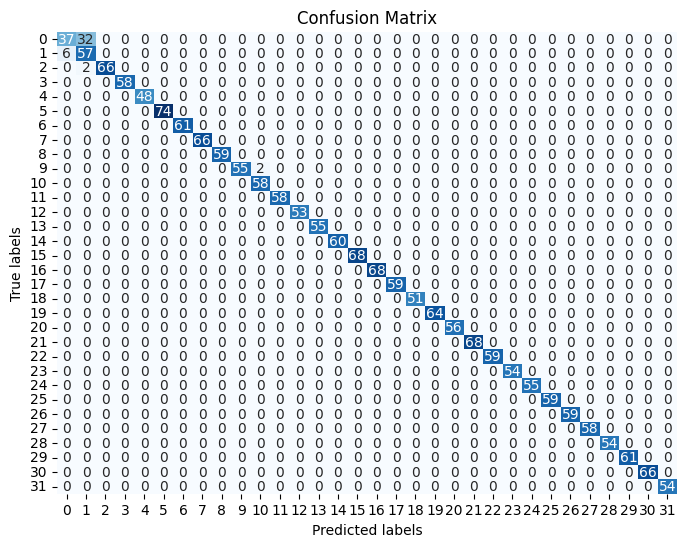

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import joblib

# Saving the trained model
joblib.dump(svc, 'ACO_MobileNet.pkl')

['ACO_MobileNet.pkl']

### On ResNet Features

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to perform Ant Colony Optimization for feature selection
def ant_colony_optimization(features, labels, num_selected_features, num_ants, iterations):
    num_features = features.shape[1]
    pheromone = np.ones(num_features)  # Initialize pheromone levels
    best_features = None
    best_accuracy = 0

    for _ in range(iterations):
        ant_paths = np.zeros((num_ants, num_selected_features), dtype=int)

        # Construct ant paths
        for ant in range(num_ants):
            probabilities = pheromone / np.sum(pheromone)
            selected_features = np.random.choice(num_features, num_selected_features, replace=False, p=probabilities)
            ant_paths[ant] = selected_features

        # Evaluate ant paths using Random Forest
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            X_train, X_test, y_train, y_test = train_test_split(features[:, selected_features], labels, test_size=0.3)
            clf = SVC()
            clf.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, clf.predict(X_test))

            # Update best features if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = selected_features

        # Update pheromone levels
        pheromone *= 0.5  # Evaporation
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            for feature in selected_features:
                pheromone[feature] += 1 / best_accuracy  # Strengthen pheromone on features contributing to best solution

    return best_features


num_selected_features = 400
num_ants = 10
iterations = 1

selected_features = ant_colony_optimization(features_2, encoded_labels, num_selected_features, num_ants, iterations)
print("Selected Features:", selected_features)

Selected Features: [ 268 1505 1966 1013  604 1344  923 1747  553  207  386  623  477 1456
  899 1746 1874  863 1190   34 1821  662  521  730 1816 1016  790 1030
 1173   97 1281 1700  823 1475  278 1015   69  756  817 1467 1932 1722
  765  935  519 1556  415  621 1518  982  244  180 1924  402 1774 1683
 1116  573  678 1292 1598 1804  421  329 1272  535 1708  983  979  764
  933 1405  825   92 1075 1187 1909 1865  746  287  807  625 1335 1200
  399  751 1550  906 2041 1827 1695    7  873  449  707 1018  844  895
  651 1885 1507  865 1276 1138 1635  173  120  918   72  879  828  912
  347  814  241   61 1502 1245 1464  368 1433 1891  443 1769  222   83
 1912  620 1554 1649 1181  646 1076 1432  755   43 1327 1618 1775  488
 1572 1969  251 1205 1073 1739  970  127 1262   41  457  548 1347 1446
 1033  463 1757  487 1718 1349  537 1959 1996 1416 1590  715 1801  813
   33  288 1271 1329  907  264 1872 1029 2004  613  691 1589  566  250
  279 1061  829  367 1560 1468  303 1561 1099  160 1354  9

In [57]:
selected_features_5 = features_2[:, selected_features]
print('Selected features:', selected_features_5)

Selected features: [[2.9272966e-03 2.4113573e-01 1.2142128e+00 ... 1.1436639e+00
  5.1912051e-01 3.7162986e-01]
 [3.2908492e-02 2.3696290e-01 1.5659338e+00 ... 1.0168272e+00
  4.8132002e-01 3.1623459e-01]
 [2.7437955e-02 4.8747733e-02 1.9959798e+00 ... 5.4870319e-01
  4.2091700e-01 1.1923683e-01]
 ...
 [8.6900918e-03 0.0000000e+00 1.1957068e+01 ... 9.4271362e-01
  4.0684432e-02 1.6975373e+00]
 [1.9525157e-02 0.0000000e+00 1.1614750e+01 ... 9.1170955e-01
  6.5602235e-02 1.2406516e+00]
 [0.0000000e+00 0.0000000e+00 1.1022700e+01 ... 8.8119578e-01
  8.1322223e-02 8.3324611e-01]]


In [58]:
selected_features_5.shape

(6400, 400)

In [61]:
# Save the selected features to the file
np.save("selected_features_5", selected_features_5)

In [59]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_5, encoded_labels, test_size=0.3, random_state=42)

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.44791666666667


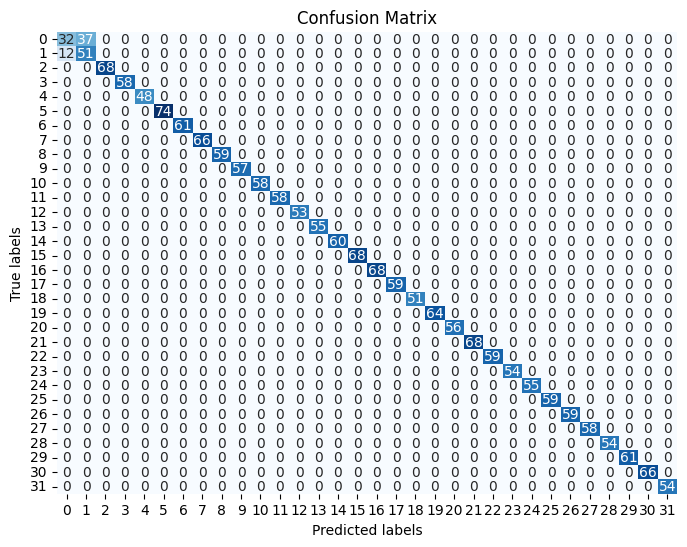

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
import joblib

# Saving the trained model
joblib.dump(svc, 'ACO_ResNet.pkl')

['ACO_ResNet.pkl']

### On Inception Features

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to perform Ant Colony Optimization for feature selection
def ant_colony_optimization(features, labels, num_selected_features, num_ants, iterations):
    num_features = features.shape[1]
    pheromone = np.ones(num_features)  # Initialize pheromone levels
    best_features = None
    best_accuracy = 0

    for _ in range(iterations):
        ant_paths = np.zeros((num_ants, num_selected_features), dtype=int)

        # Construct ant paths
        for ant in range(num_ants):
            probabilities = pheromone / np.sum(pheromone)
            selected_features = np.random.choice(num_features, num_selected_features, replace=False, p=probabilities)
            ant_paths[ant] = selected_features

        # Evaluate ant paths using SVM
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            X_train, X_test, y_train, y_test = train_test_split(features[:, selected_features], labels, test_size=0.3)
            clf = SVC()
            clf.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, clf.predict(X_test))

            # Update best features if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = selected_features

        # Update pheromone levels
        pheromone *= 0.5  # Evaporation
        for ant in range(num_ants):
            selected_features = ant_paths[ant]
            for feature in selected_features:
                pheromone[feature] += 1 / best_accuracy  # Strengthen pheromone on features contributing to best solution

    return best_features


num_selected_features = 100
num_ants = 10
iterations = 1

selected_features = ant_colony_optimization(features_3, encoded_labels, num_selected_features, num_ants, iterations)
print("Selected Features:", selected_features)

Selected Features: [1410 1050  239  286  320  495 1096 1468  883 1632   80  499  970  783
  206  908  828  575  123  929  235  242 1226 1727 1147   52  298 1267
  924 1713  984 1250 1554 1086  905 1309 1599 1249 1345 1688 1737  725
  401 1294 1733  999  187  768 1389  128  882  950 1870 1683 1024 1772
 1349 1281  798  903 2007  625  177  856 1196  669 1685   46 1290  477
  340  921 1158 1941  193  210  216 1859  407  973 1693  120  733  691
 1048  906 1353 1750 1384 1833  338 1355 1369  431 2018  283 1317  363
    5  784]


In [65]:
selected_features_6 = features_3[:, selected_features]
print('Selected features:', selected_features_6)

Selected features: [[ 2.0825508   1.5189182  12.859856   ...  0.0491222   7.1344037
   0.350122  ]
 [ 2.0904753   1.5010043  12.163208   ...  0.0454537   7.649065
   0.39375097]
 [ 1.9527276   1.3437064   8.172259   ...  0.07250953  8.2349415
   0.54746264]
 ...
 [ 1.5413787   1.0535474   0.5946949  ...  1.1598934   2.013558
   0.1597434 ]
 [ 1.3183359   1.0556346   0.8029469  ...  1.4403086   2.1892948
   0.18841037]
 [ 1.4825892   1.144742    1.2718232  ...  1.6755698   2.7730846
   0.13688062]]


In [66]:
selected_features_6.shape

(6400, 100)

In [67]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_6, encoded_labels, test_size=0.3, random_state=42)

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  96.77083333333333


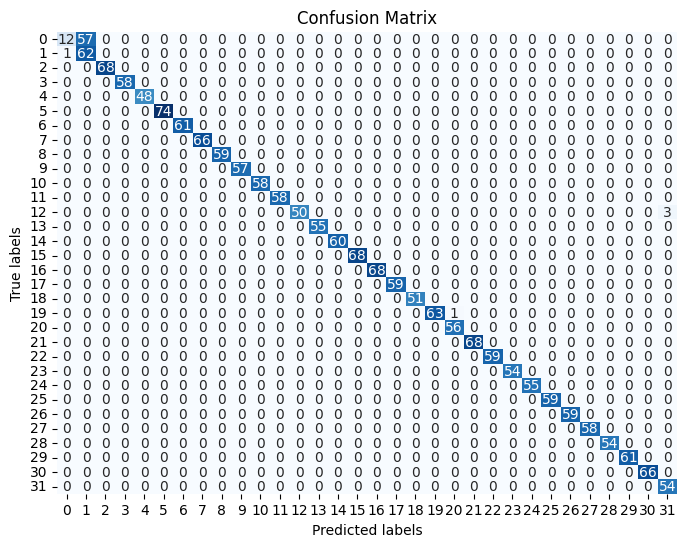

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [70]:
import joblib

# Saving the trained model
joblib.dump(svc, 'ACO_Inception.pkl')

['ACO_Inception.pkl']

In [71]:
# Save the selected features to the file
np.save("selected_features_6", selected_features_6)

## Feature Selection Using PSO

### On MobileNet Features

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import random

# Define PSO parameters
num_particles = 10
max_iterations = 1
max_selected_features = 100  # Maximum number of features to select
w = 0.5  # Inertia weight
c1 = 2.0  # Personal acceleration coefficient
c2 = 2.0  # Social acceleration coefficient
num_features = features_1.shape[1]  # Number of features

# Define fitness function
def fitness_function(selected_features):
    # Extract selected features
    selected_indices = np.where(selected_features == 1)[0]  # Get indices of selected features
    selected_data = features_1[:, selected_indices]
    labels = encoded_labels
    # Define an SVM classifier
    svm_classifier = SVC()
    
    # Evaluate the classifier using cross-validation
    # You may need to adjust the number of folds and scoring metric based on your specific problem
    scores = cross_val_score(svm_classifier, selected_data, labels, cv=5, scoring='accuracy')
    
    # Return the mean accuracy as the fitness value
    return np.mean(scores)

# Initialize particles and velocities
particles_position = np.random.randint(2, size=(num_particles, num_features))  # Binary representation of feature selection
particles_velocity = np.zeros((num_particles, num_features))

global_best_position = np.zeros(num_features)
global_best_fitness = float('-inf')

# PSO loop
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Evaluate fitness of each particle
        fitness = fitness_function(particles_position[i])
        
        # Update personal best position and fitness
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i]
        
        # Apply constraint: limit the number of selected features to max_selected_features
        selected_indices = np.where(global_best_position == 1)[0]
        if len(selected_indices) > max_selected_features:
            # Randomly remove excess selected features
            excess_features = len(selected_indices) - max_selected_features
            selected_indices_to_remove = random.sample(list(selected_indices), excess_features)
            global_best_position[selected_indices_to_remove] = 0
        
        # Update particle velocity
        particles_velocity[i] = (w * particles_velocity[i] +
                                 c1 * random.random() * (global_best_position - particles_position[i]) +
                                 c2 * random.random() * (global_best_position - particles_position[i]))
        
        # Update particle position
        particles_position[i] = np.clip(particles_position[i] + particles_velocity[i], 0, 1)
    
    print("Iteration:", iteration+1, "Global Best Fitness:", global_best_fitness)

Iteration: 1 Global Best Fitness: 0.9803125000000001


In [87]:
selected_indices = np.where(global_best_position==1)[0]

In [88]:
selected_features_7 = features_1[:, selected_indices]
print('Selected features:', selected_features_7)

Selected features: [[1.5536752  0.2704959  0.40694958 ... 0.32543793 0.         0.        ]
 [1.6288143  0.08184828 0.33095422 ... 0.44039476 0.         0.        ]
 [1.2698202  0.20189017 0.30785307 ... 0.36691058 0.         0.        ]
 ...
 [1.3942277  0.5914649  0.00410235 ... 1.7793154  0.00964705 0.        ]
 [1.3024468  0.52292955 0.01390641 ... 1.8460729  0.04425906 0.        ]
 [1.3274277  1.156347   0.01318596 ... 2.1247225  0.02815964 0.        ]]


In [89]:
selected_features_7.shape

(6400, 100)

In [95]:
np.save('selected_features_7.npy', selected_features_7)

In [90]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_7, encoded_labels, test_size=0.3, random_state=42)

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  98.4375


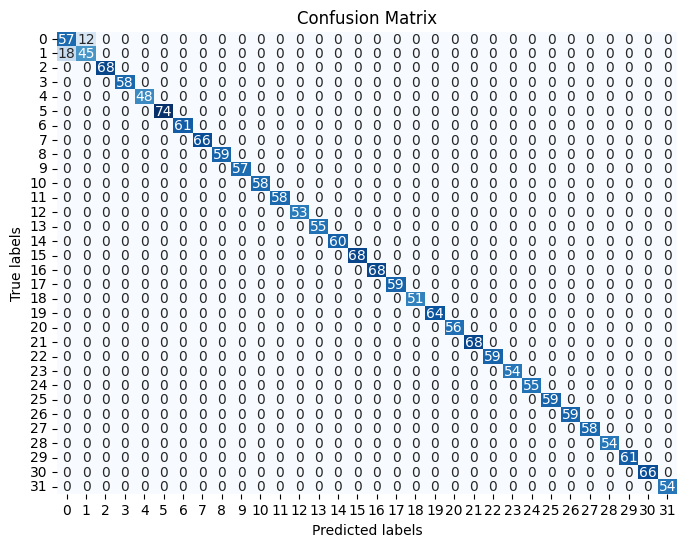

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [94]:
import joblib

# Saving the trained model
joblib.dump(svc, 'PSO_MobileNet.pkl')

['PSO_MobileNet.pkl']

### On ResNet Features

In [96]:
# Define PSO parameters
num_particles = 10
max_iterations = 1
max_selected_features = 100  # Maximum number of features to select
w = 0.5  # Inertia weight
c1 = 2.0  # Personal acceleration coefficient
c2 = 2.0  # Social acceleration coefficient
num_features = features_2.shape[1]  # Number of features

# Define fitness function
def fitness_function(selected_features):
    # Extract selected features
    selected_indices = np.where(selected_features == 1)[0]  # Get indices of selected features
    selected_data = features_2[:, selected_indices]
    labels = encoded_labels
    # Define an SVM classifier
    svm_classifier = SVC()
    
    # Evaluate the classifier using cross-validation
    # You may need to adjust the number of folds and scoring metric based on your specific problem
    scores = cross_val_score(svm_classifier, selected_data, labels, cv=5, scoring='accuracy')
    
    # Return the mean accuracy as the fitness value
    return np.mean(scores)

# Initialize particles and velocities
particles_position = np.random.randint(2, size=(num_particles, num_features))  # Binary representation of feature selection
particles_velocity = np.zeros((num_particles, num_features))

global_best_position = np.zeros(num_features)
global_best_fitness = float('-inf')

# PSO loop
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Evaluate fitness of each particle
        fitness = fitness_function(particles_position[i])
        
        # Update personal best position and fitness
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i]
        
        # Apply constraint: limit the number of selected features to max_selected_features
        selected_indices = np.where(global_best_position == 1)[0]
        if len(selected_indices) > max_selected_features:
            # Randomly remove excess selected features
            excess_features = len(selected_indices) - max_selected_features
            selected_indices_to_remove = random.sample(list(selected_indices), excess_features)
            global_best_position[selected_indices_to_remove] = 0
        
        # Update particle velocity
        particles_velocity[i] = (w * particles_velocity[i] +
                                 c1 * random.random() * (global_best_position - particles_position[i]) +
                                 c2 * random.random() * (global_best_position - particles_position[i]))
        
        # Update particle position
        particles_position[i] = np.clip(particles_position[i] + particles_velocity[i], 0, 1)
    
    print("Iteration:", iteration+1, "Global Best Fitness:", global_best_fitness)

Iteration: 1 Global Best Fitness: 0.9676562500000001


In [97]:
selected_indices = np.where(global_best_position==1)[0]

In [98]:
selected_features_8 = features_2[:, selected_indices]
print('Selected features:', selected_features_7)

Selected features: [[1.5536752  0.2704959  0.40694958 ... 0.32543793 0.         0.        ]
 [1.6288143  0.08184828 0.33095422 ... 0.44039476 0.         0.        ]
 [1.2698202  0.20189017 0.30785307 ... 0.36691058 0.         0.        ]
 ...
 [1.3942277  0.5914649  0.00410235 ... 1.7793154  0.00964705 0.        ]
 [1.3024468  0.52292955 0.01390641 ... 1.8460729  0.04425906 0.        ]
 [1.3274277  1.156347   0.01318596 ... 2.1247225  0.02815964 0.        ]]


In [99]:
selected_features_8.shape

(6400, 100)

In [102]:
np.save('selected_features_8.npy', selected_features_8)

In [100]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_8, encoded_labels, test_size=0.3, random_state=42)

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  97.39583333333334


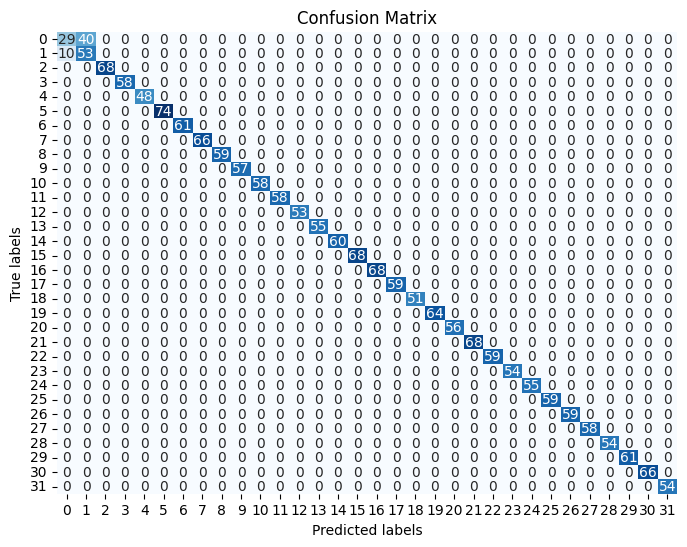

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
import joblib

# Saving the trained model
joblib.dump(svc, 'PSO_ResNet.pkl')

['PSO_ResNet.pkl']

### On Inception Features

In [105]:
# Define PSO parameters
num_particles = 10
max_iterations = 1
max_selected_features = 100  # Maximum number of features to select
w = 0.5  # Inertia weight
c1 = 2.0  # Personal acceleration coefficient
c2 = 2.0  # Social acceleration coefficient
num_features = features_3.shape[1]  # Number of features

# Define fitness function
def fitness_function(selected_features):
    # Extract selected features
    selected_indices = np.where(selected_features == 1)[0]  # Get indices of selected features
    selected_data = features_3[:, selected_indices]
    labels = encoded_labels
    # Define an SVM classifier
    svm_classifier = SVC(kernel='linear', class_weight='balanced', probability=True)
    
    # Evaluate the classifier using cross-validation
    # You may need to adjust the number of folds and scoring metric based on your specific problem
    scores = cross_val_score(svm_classifier, selected_data, labels, cv=5, scoring='accuracy')
    
    # Return the mean accuracy as the fitness value
    return np.mean(scores)

# Initialize particles and velocities
particles_position = np.random.randint(2, size=(num_particles, num_features))  # Binary representation of feature selection
particles_velocity = np.zeros((num_particles, num_features))

global_best_position = np.zeros(num_features)
global_best_fitness = float('-inf')

# PSO loop
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Evaluate fitness of each particle
        fitness = fitness_function(particles_position[i])
        
        # Update personal best position and fitness
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i]
        
        # Apply constraint: limit the number of selected features to max_selected_features
        selected_indices = np.where(global_best_position == 1)[0]
        if len(selected_indices) > max_selected_features:
            # Randomly remove excess selected features
            excess_features = len(selected_indices) - max_selected_features
            selected_indices_to_remove = random.sample(list(selected_indices), excess_features)
            global_best_position[selected_indices_to_remove] = 0
        
        # Update particle velocity
        particles_velocity[i] = (w * particles_velocity[i] +
                                 c1 * random.random() * (global_best_position - particles_position[i]) +
                                 c2 * random.random() * (global_best_position - particles_position[i]))
        
        # Update particle position
        particles_position[i] = np.clip(particles_position[i] + particles_velocity[i], 0, 1)
    
    print("Iteration:", iteration+1, "Global Best Fitness:", global_best_fitness)

Iteration: 1 Global Best Fitness: 0.9756250000000002


In [106]:
selected_indices = np.where(global_best_position==1)[0]

In [107]:
selected_features_9 = features_3[:, selected_indices]
print('Selected features:', selected_features_7)

Selected features: [[1.5536752  0.2704959  0.40694958 ... 0.32543793 0.         0.        ]
 [1.6288143  0.08184828 0.33095422 ... 0.44039476 0.         0.        ]
 [1.2698202  0.20189017 0.30785307 ... 0.36691058 0.         0.        ]
 ...
 [1.3942277  0.5914649  0.00410235 ... 1.7793154  0.00964705 0.        ]
 [1.3024468  0.52292955 0.01390641 ... 1.8460729  0.04425906 0.        ]
 [1.3274277  1.156347   0.01318596 ... 2.1247225  0.02815964 0.        ]]


In [108]:
selected_features_9.shape

(6400, 100)

In [113]:
np.save('selected_features_9.npy', selected_features_9)

In [111]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(selected_features_9, encoded_labels, test_size=0.3, random_state=42)

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a SVC object
svc = SVC()

# We'll use Cross Validation Grid Search to find best parameters.
# Classifier will be trained using each parameter 
svc.fit(features_train,labels_train)

y_pred = svc.predict(features_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=labels_test)*100)

Accuracy score of model is  96.77083333333333


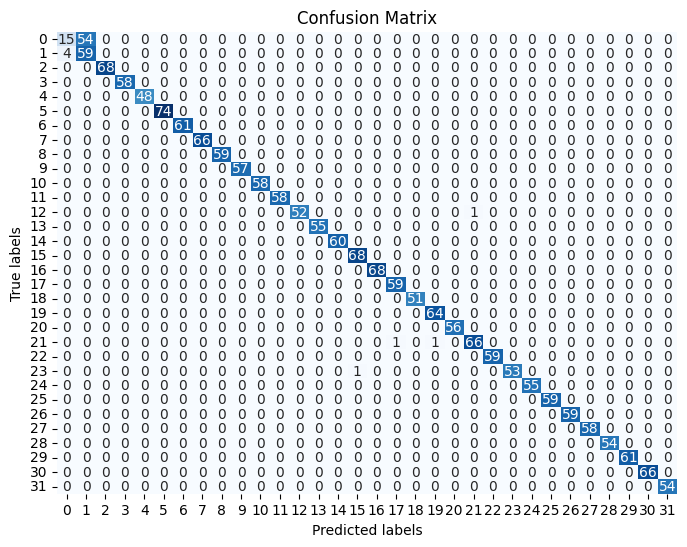

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_true=labels_test, y_pred=y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [115]:
import joblib

# Saving the trained model
joblib.dump(svc, 'PSO_Inception.pkl')

['PSO_Inception.pkl']

## Comparision

In [132]:
from tabulate import tabulate

data = [
    ["MobileNet", 97.55, 97.81, 98.43, 99.11],
    ["ResNet", 97.29, 97.44, 97.39, 97.34],
    ["Inception", 96.40, 96.77, 96.77, 96.87]
]

headers = ["Model", "Base", "ACO", "PSO", "GA"]

print(tabulate(data, headers=headers, floatfmt=".2f"))

Model        Base    ACO    PSO     GA
---------  ------  -----  -----  -----
MobileNet   97.55  97.81  98.43  99.11
ResNet      97.29  97.44  97.39  97.34
Inception   96.40  96.77  96.77  96.87
